# Attention is All You Need

This is the title of this notebook, here I train transformer network from 'Attention is all you need' on a toy training set. You can read the [paper](https://arxiv.org/pdf/1706.03762.pdf) and understand more about it.

### History

Most common method used to implement machine translation/language model is to use RNN, a simple LSTM Encoder module that generates a final hidden state and LSTM Decoder that uses that hidden state to generate output. The main issue with these models has always not only been the trianing time it took but also the travel each word had to travel in sequence.

Till date the most efficient models have used atttention mechanisms. At the gist attention mechanism can tell by going back which word in input sequence it should focus on inorder to predict the word at output right now. The most common attention mechanism is self-attention. The main problem with using self-attention mechanism is the lack of temporal knowledge, since it goes over the entire input it has no way of knowing the order/position (temporal information) of word.

Another models that have been succesfull at this task are Convolution Models. The main advantage being the processing speed and training time, since the GPUs are much more optimised to perform this kind of operations.

##### You can learn more about the benefit of using this over RNN and it's crucial details on the [blog post]() I wrote.

In [1]:
# importing the dependencies
%matplotlib inline
import os # os iteraction
import numpy as np # linear algebra
import tensorflow as tf # ML
import matplotlib.pyplot as plt # visualisation
from transformer import Transformer # our model

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Making the toy dataset

Due to my hardware limitations, I can't train the model on actual dataset. But will train it on toy dataset, made up of fake language. The best way to image this is using visualisations, and this is what we have done. For simplycity we are keeping parrameters of both the languages same.

In [2]:
# params
vocab_size = 127 # vocabulary size
max_len_sent = 30 # size of the longest sentence
min_len_sent = 6 # size of the smallest sentence
num_samples = 8000 # number of sentences
test_split = 0.05 # ratio of testing data to total data
batch_size = 50 # mini-batch size

# paddings - since this is a toy task, we won't need end or start init values
# neither would we need these: <UNK>, <START>, <EOS>, etc.

# language 1
len_senteces = [np.random.randint(low = min_len_sent, high = max_len_sent+1) for _ in range(num_samples)]
data_1 = np.asarray([np.random.randint(vocab_size, size = len_senteces[i]) for i in range(num_samples)])
print(data_1.shape)

# language 2
data_2 = np.asarray([np.random.randint(vocab_size, size = len_senteces[i]) for i in range(num_samples)])
print(data_2.shape)

(8000,)
(8000,)


In [3]:
# get the information about lengths
lens_d1 = [len(i) for i in data_1]
lens_d2 = [len(i) for i in data_2]

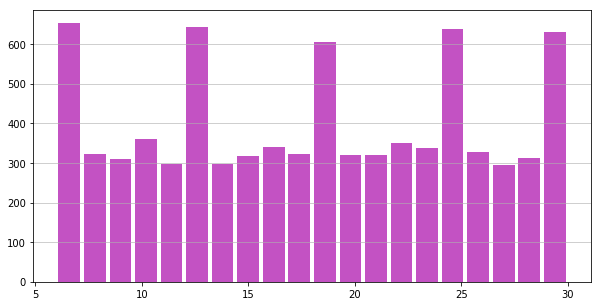

In [4]:
# let's visualise lenghts distribution
plt.figure(figsize = (10, 5))
plt.hist(x = lens_d1, bins='auto', color='#aa08aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

[44 47 25 36  6 23]


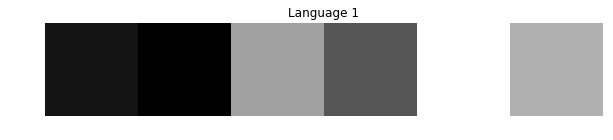

In [5]:
# input sentence
print(data_1[0])
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.title('Language 1')
plt.imshow(np.reshape(data_1[0], [1,-1]), cmap = 'Greys')

[ 76 118  62  19 106  51]


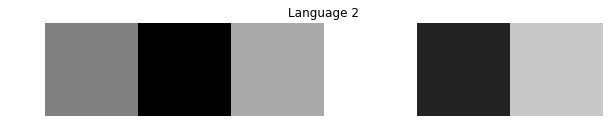

In [6]:
# target sentence
print(data_2[0])
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.title('Language 2')
plt.imshow(np.reshape(data_2[0], [1,-1]), cmap = 'Greys')

In [7]:
# shuffle the indexes
all_ids = np.arange(0, len(data_1))
np.random.shuffle(all_ids)
test_ids = all_ids[:int(test_split * len(data_1))]
train_ids = all_ids[int(test_split * len(data_1)):]

# get data according to these idexes
train_input = data_1[train_ids]
train_target = data_2[train_ids]
test_input = data_1[test_ids]
test_target = data_2[test_ids]

# reshape the data as [<NUM_SAMPLES>, 1, <NUM_WORDS>]
train_input = np.expand_dims(train_input, axis = 1)
train_target = np.expand_dims(train_target, axis = 1)
test_input = np.expand_dims(test_input, axis = 1)
test_target = np.expand_dims(test_target, axis = 1)

# print stats
print('Shape of training input is:', train_input.shape)
print('Shape of test data:', test_input.shape)

Shape of training input is: (7600, 1)
Shape of test data: (400, 1)


In [8]:
e_dim = 32 # embedding dimension
'''
Embedding dimension should be less than the vocab size, this is due to common sense. The most
ideal embedding mechanism would be one where the most of the words are orthogonal to each other.
I say most because then similar words can be clustered together while the rest will be away from
each other. So in fact using one-hot encoding for words is not an ideal embedding mechanism.
Since out vocab size is quite limted our embedding dimension should also be correspondingly
smaller. We will be using simple embedding matrix in numpy and get the values from those. In
practice we should always put all these functions in the model and use the tf.nn.embedding_lookup.
But this is a toy task and we can get away with it.
'''
print(e_dim)

32


## Training the network

We first initialise our network according to our requirements, i.e. we trim down on the model parameters and number of stacks used in encoder/decoder.

In [9]:
model = Transformer(VOCAB_SIZE = vocab_size, DIM_MODEL = e_dim, NUM_HEADS = 4, FF_MID = 36)
num_epochs = 10

In [10]:
# let's train this baby
loss_train = []
loss_test = []
for i in range(num_epochs):
    # for each epoch
    loss_epoch = []
    for i in range(len(train_input)):
        # for each sample
        gen, loss = model.run(input_seq = train_input[i], output_seq = train_target[i], is_training = True)
        loss_epoch.append(np.mean(loss))
        
    print('average loss this epoch:', np.mean(loss_epoch[-1]))

KeyboardInterrupt: 

# Limitations

Due to my hardware limitations, training these models is very difficult. You are free to use these as you want